In [1]:
#from SSIM_PIL import compare_ssim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd


import skimage
from skimage.io import imread
from sklearn.metrics import mean_squared_error
import os

iteration=20

In [2]:
def get_Noise(image, prob):
    #'''
    #Add salt and pepper noise to image
    #prob: Probability of the noise
    #'''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

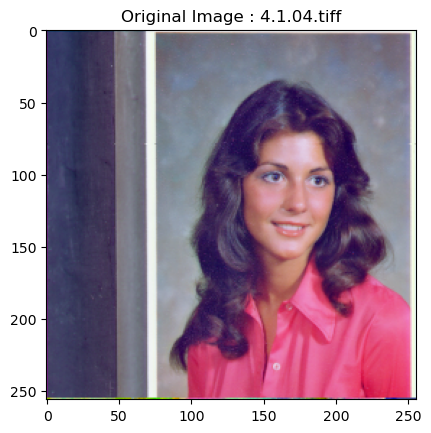

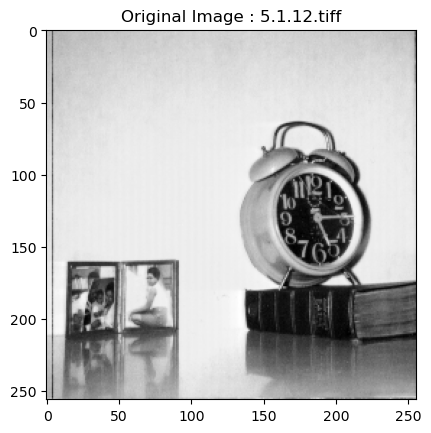

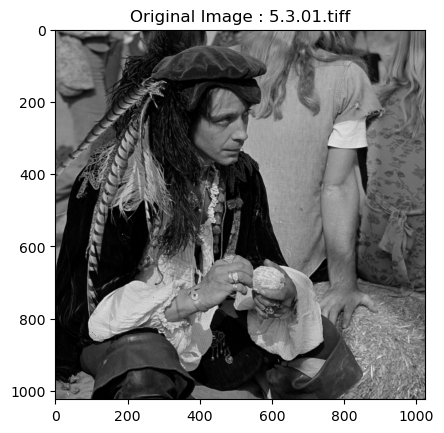

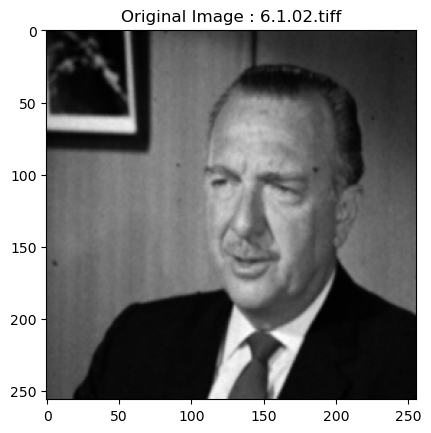

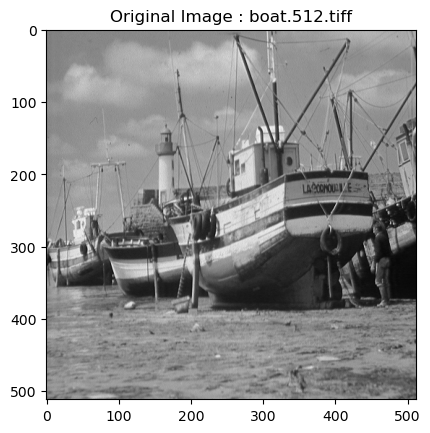

In [3]:
path='C://Users//Biswarup Mistry//Desktop//NoisyImage//'  #defining the image directory path
dir_list = os.listdir(path)
for item in dir_list :
    k=str(path+str(item))
    img = imread(k)
    
    plt.title('Original Image : '+item)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.show()


In [6]:
def MseVsNoiseDensity():   #getting corresponding mse(s) for given noise density 'd'
    dataframe = pd.DataFrame()    
    for item in dir_list :
        k=str(path+str(item))
        img = imread(k)
        x=[]
        y=[]
        df=np.array([])
        i=iteration
        d=0.0
        while(i>0 and d<=1.0):
            noise_img=get_Noise(img,d) #getting noisy image
            mse=np.square(np.subtract(img,noise_img)).mean() #calculating MSE of Original image and Image with Noise
            x.append(d)
            y.append(mse)
            df=np.append(df,mse)
            d=d+0.05
            i=i-1
            img.close()
            # writing noisy data in image
            #fin = open(k, 'wb')
            #fin.write(noise_img)
            #fin.close()
        dataframe[item] = df
    dataframe.to_csv(path+'MSEvsNoiseDensity.csv', index=False)



In [7]:
MseVsNoiseDensity() #creating the Mse(s) csv file
#data=pd.read_csv('MSEvsNoiseDensity.csv')
#data


AttributeError: 'numpy.ndarray' object has no attribute 'close'

In [7]:
p1=str(path+'//'+'MSEvsNoiseDensity.csv')
data=pd.read_csv(p1)
df=pd.DataFrame(data)
def combined(dir_list,iteration): #for combined graph ploting of MSE(s) vs Noise Density
    x=[]
    d=0.0
    while iteration>0:
        x.append(d)
        d=d+0.05 
        iteration=iteration-1
    plt.title('MSE(s) vs Density')
    plt.xlabel('density')
    plt.ylabel('MSE(s)') 
    for item in dir_list:
        plt.scatter(x,df[item],marker='o')
        plt.plot(x,df[item])
    plt.axvline(0.5, color='k', linestyle='--')
    plt.show()

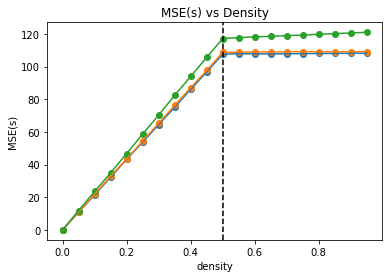

In [8]:
combined(dir_list,iteration) 

In [7]:
def ecryptDecrypt(path,key):
    # try block to handle exception
    try:
        
        # take path of image as a input
        #path = input(r'Enter path of Image : ')

        # taking encryption key as input
        #key = int(input('Enter Key for encryption of Image : '))


        # print path of image file and encryption key that
        # we are using
        print('The path of file : ', path)
        print('Key for encryption : ', key)

        # open file for reading purpose
        fin = open(path, 'rb')

        # storing image data in variable "image"
        image = fin.read()
        fin.close()

        # converting image into byte array to
        # perform encryption easily on numeric data
        image = bytearray(image)

        # performing XOR operation on each value of bytearray
        for index, values in enumerate(image):
            image[index] = values ^ key

        # opening file for writing purpose
        fin = open(path, 'wb')

        # writing encrypted data in image
        fin.write(image)
        fin.close()
        print('Encryption Done...')

    except Exception:
        print('Error caught : ', Exception.__name__)


In [ ]:
path='C://Users//Biswarup Mistry//Desktop//Misc//'